In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics
%matplotlib inline

In [13]:
dataset = pd.read_csv('student_scores.csv')

In [14]:
dataset.shape

(25, 2)

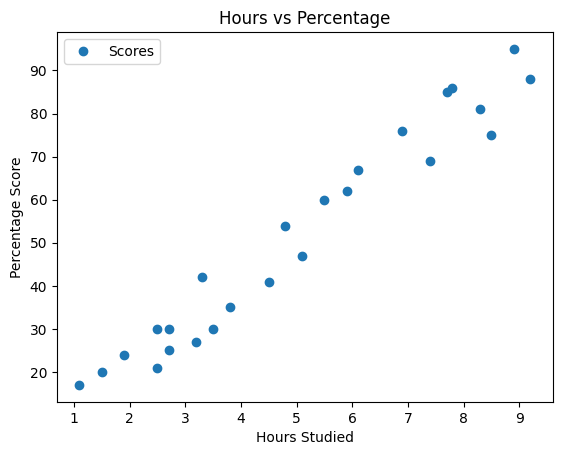

In [15]:
dataset.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage') 
plt.xlabel('Hours Studied') 
plt.ylabel('Percentage Score') 
plt.show()

Теперь у нас есть представление о наших данных. Следующим шагом является разделение данных на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе данных всего два столбца. Мы хотим предсказать процентную оценку в зависимости от изученных часов. Поэтому наш набор атрибутов будет состоять из столбца «Часы», а меткой будет столбец «Оценка».

In [16]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 1].values

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Приведенный выше скрипт разделяет 80% данных на обучающий набор, а 20% данных – на набор тестов. Переменная test_size -–это то место, где мы фактически указываем пропорцию набора тестов.

In [18]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

модель линейной регрессии в основном находит наилучшее значение для точки пересечения и наклона, в результате чего получается линия, которая наилучшим образом соответствует данным. Чтобы увидеть значение точки пересечения и наклона, вычисленное алгоритмом линейной регрессии для нашего набора данных, выполните следующий код.

In [19]:
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


Теперь, когда мы обучили наш алгоритм, пришло время сделать некоторые прогнозы. Для этого мы воспользуемся нашими тестовыми данными и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогнозы на тестовых данных, выполним следующий код

In [20]:
y_pred = regressor.predict(X_test)

Y_pred – это массив numpy, который содержит все предсказанные значения для входных значений в серии X_test. Чтобы сравнить фактические выходные значения для X_test с прогнозируемыми значениями, выполните следующий скрипт:

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Теперь посчитаем метрики

In [22]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("MAE =", mae)
print("MAPE =", mape)
print("R2 =", r2)

MAE = 4.183859899002982
MAPE = 0.12568891617045685
R2 = 0.9454906892105354
